# Reasonable way to place macros in text.

Some strings contain delimiters that identify them with a specific syntax.

* Markdown has ticks
* Yaml has dashes
* Graphviz has graph/digraph
* Latex has Dollar signs.

# The Node Transformer

Node transformers do what . ....
IPython accepts node transformers

https://greentreesnakes.readthedocs.io/

In [1]:
    import ast, abc

The NodeTransformer will takes two attributes:

* A condition that must be satisfied to trigger the replacement.
* A formatable string that can be replaced with the desired source.

This class is to be reused as a base class.

    >>> class NewTransformer(StrTokenTransformerMeta): ...

In [2]:
    class StrTokenTransformerMeta(ast.NodeTransformer, metaclass=abc.ABCMeta):
        @abc.abstractstaticmethod
        def condition(self, callable: str) -> bool:
            """A callable that tests a string condition."""
            raise NotImplemented()
            
        @abc.abstractproperty
        def replacement(self, str) -> str:
            """A block string to replace a condition with."""
            raise NotImplemented()
            
        

> `abstractproperty` is not required, but it doesn't hurt.  If this is confusing, just know we can't create a new `StrTokenTransformerMeta` class without the `condition` or `replacement` attributes existing and being `staticmethod` and `abstractproperty`, respectively.

`StrTokenTransformer` defines import `NodeTransformer` attributes.

In [3]:
    class StrTokenTransformer(StrTokenTransformerMeta):
        def generic_visit(self, node): return node
        
        def visit_Expr(self, node):
            if isinstance(node.value, ast.Str):
                str = node.value.s
                if self.condition(str):
                    return ast.parse(self.replace(str)).body[0]
            return node
        
        def visit_Module(self, node): return super().generic_visit(node)
        
        def replace(self, str):
            """Validate the source, before continuing."""
            self.validate()
            quotes = '"""'
            if quotes in str: quotes = "'''"
            return self.replacement.format(
                quotes + '{}' + quotes).format(str)
            
        def validate(self):
            """Validate that the replacement string is Python."""
            try: ast.parse(self.replacement)
            except: raise StrTokenTransformerException(self.replacement)
                

It is a good practice to define our own exceptions.

In [4]:
    class StrTokenTransformerException(BaseException): ...

## A graphviz replacement

When a string starts with __graph__ or __digraph__ show a [__graphviz__]() repr.

In [5]:
    class GraphViz(StrTokenTransformer):
        replacement = """__import__('graphviz').Source({})"""
        condition = staticmethod(lambda str: str.startswith('graph') or str.startswith('digraph'))

> The graphviz syntax looks extra boss with [Fira-Code]().

## A yaml replacement

In [6]:
    class YamlDefinition(StrTokenTransformer):
        replacement = """globals().update(
            __import__('collections').ChainMap(*reversed(list(
                __import__('yaml').safe_load_all(
                    __import__('io').StringIO({}))))))"""
        condition = staticmethod(lambda str: str.startswith('---\n'))

## An Iframe replacement.

In [7]:
    class IframeDisplay(StrTokenTransformer):
        replacement = """__import__('IPython').display.display(
            __import__('IPython').display.IFrame(
                {}, 600, 400))"""
        condition = staticmethod(lambda str: str.startswith('http:') or str.startswith('https:'))

## An IPython extension

In [8]:
    def load_ipython_extension(ip=None):
        ip = ip or __import__('IPython').get_ipython()
        ip.ast_transformers = [GraphViz(), YamlDefinition(), IframeDisplay()]
        
    load = load_ipython_extension

## Usage

    >> __import__('__String_Node_Transformer').load()

In [9]:
    Ø = __name__ == '__main__'
    Ø and load_ipython_extension()

### GraphViz Example

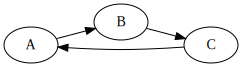

In [19]:
    """digraph {rankdir="LR" A->B->C->A}"""

In [20]:
    if Ø: assert isinstance(_, __import__('graphviz').Source), "Likely, note run in an interactive context."

### Yaml Example

In [11]:
    """---
    foo: 42
    ---
    foo: 100"""
    if Ø: assert foo is 100, """The transformer is likely not loaded."""

# What other replacements could you imagine?